In [1]:
#import files and packages
import pandas as pd
import seaborn as sns
ordersDF = pd.read_csv("../data/Orders.csv")
ordersDF.head()


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [29]:
returnsDF = pd.read_csv("../data/Returns.csv")
returnsDF.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [2]:

import numpy as np
import re
import matplotlib.pyplot as plt


In [3]:
#Problem1 Convert Profit and Sales to numeric
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace('$',''))
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace(' ',''))
ordersDF['Profit'] = ordersDF.Profit.apply(lambda x: x.replace(',',''))
ordersDF['Profit'] = pd.to_numeric(ordersDF['Profit'])

ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace('$',''))
ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace(' ',''))
ordersDF['Sales'] = ordersDF.Sales.apply(lambda x: x.replace(',',''))
ordersDF['Sales'] = pd.to_numeric(ordersDF['Sales'])


In [4]:
#Check Averages
print(ordersDF['Sales'].mean())
print(ordersDF['Profit'].mean())

246.49068531878765
28.610970364593253


In [5]:
#Check averages for Order Priority, is there an increase in price for urgency
ordersDF.groupby('Order.Priority').mean()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
Order.Priority,,,,,,,
Critical,26046.747457,54771.961686,250.822930,3.417854,0.136516,31.593141,59.747440
High,25751.321141,55597.518410,245.632546,3.485001,0.143341,27.119091,32.933931
Low,24655.840347,58667.250000,234.251716,3.422855,0.142200,24.197966,27.139061
Medium,25617.670574,54765.879159,247.371836,3.484354,0.143592,29.361721,18.579989


In [6]:
#Create month column to see if there is seasonility by month
ordersDF['month'] = pd.DatetimeIndex(ordersDF['Order.Date']).month
ordersDF.groupby('month').sum()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
month,,,,,,,
1,71468915,21500486.0,676789.30,8872,365.122,73440.45,71225.18900
2,60085551,17761468.0,554650.21,7429,307.574,72932.18,59878.28000
3,79093205,36758872.0,760518.34,10390,432.354,91873.45,76723.92404
4,75926778,34498859.0,695978.86,10466,448.146,73822.57,75072.86600
5,98261611,40926610.0,915493.24,13196,543.822,106970.07,102015.17500
6,131905558,37416928.0,1262081.29,18009,790.932,144604.35,136484.15800
7,83547530,38467854.0,752306.46,11046,480.996,76525.50,83946.55136
8,134609033,40569319.0,1294315.55,17596,669.940,154593.48,136980.73600
9,152061754,74350359.0,1431754.01,20479,817.468,169705.94,149609.70900


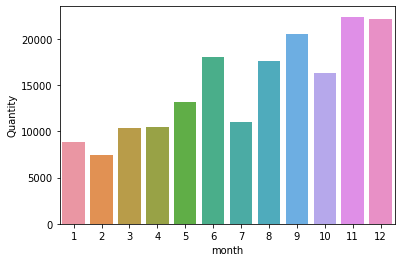

In [9]:
MonthGroup = ordersDF.groupby('month').sum()
MonthGroup['month'] = MonthGroup.index
MonthGroup
sns.barplot(x='month', y ='Quantity', data = MonthGroup)

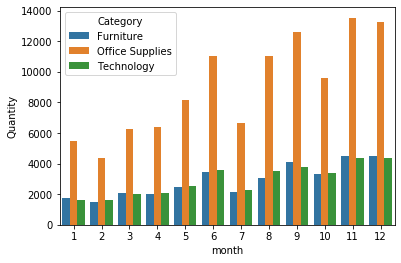

In [26]:
Monthcat = ordersDF.groupby(['Category', 'month']).sum()
Monthcat= Monthcat.reset_index()
Monthcat
sns.barplot(x='month', y ='Quantity', hue= 'Category',data = Monthcat)

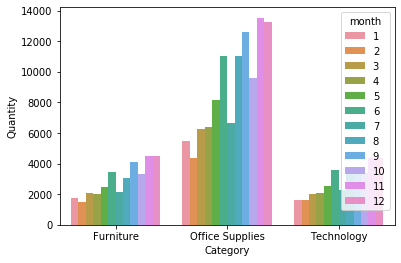

In [27]:
sns.barplot(x='Category', y ='Quantity', hue= 'month',data = Monthcat)

In [28]:
#Convert Order Date to date time object check seasonality by day,month,year -- can we see an increase in Order amounts
ordersDF['Order.Date']= pd.to_datetime(ordersDF['Order.Date']) 

In [ ]:
#problem 3 - 1
#merge two datasets
